# Evaluation and Confusion Matrices

**Author: [Kevin Broløs](https://abzu.ai/team)**

There are different ways of evaluation your model.

Here, we'll introduce a few concepts so they're familiar when you see them in practice

In [1]:
# Load some dependencies
from sklearn.metrics import confusion_matrix
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a fake dataset/result to showcase confusion matrices
labels = ['Class 1', 'Class 2']

# "Expected" output vector
y = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

# Input column
X = np.array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1])


# Create a fake model that just returns the input
class FakeModel(sklearn.base.ClassifierMixin):    
    def __init__(self, labels):
        self.classes_ = labels
        
    def predict(self, X):
        return X

estimator = FakeModel(labels)

In [3]:
estimator.predict(X)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

# The Confusion Matrix

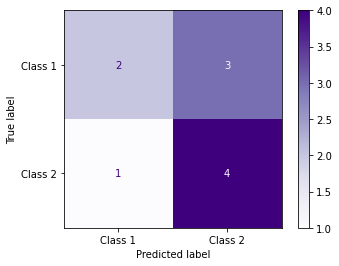

In [4]:
sklearn.metrics.plot_confusion_matrix(estimator, X, y, cmap=plt.cm.Purples)
plt.show()

You'll see our fake model that just returns the input results in manages to successfully classify:

Found in the diagonal
* 2 of class 1
* 4 of class 2

On the other two corners:
* 1 was predicted to be class 1, but should have been class 2
* 3 were predicted to be class 2, but should have been class 1

We can calculate metrics for these to help us understand how our model performs. The most normal ones are:

* Accuracy  ((TP + TN) / N)
* Precision (TP / (TP + FP))
* Recall    (TP / (TP + FN))

Where:
* TP = True Positive
* TN = True Negative
* FP = False Positive
* FN = False Negative
* N  = The total amount of samples

sklearn has some methods for this, of course

In [5]:
prediction = estimator.predict(X)

accuracy = sklearn.metrics.accuracy_score(y, prediction)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 60.00%


In [6]:
precision = sklearn.metrics.precision_score(y, prediction)
print(f"Precision: {precision:.2%}")

Precision: 57.14%


In [7]:
recall = sklearn.metrics.recall_score(y, prediction)
print(f"Recall: {recall:.2%}")

Recall: 80.00%


In this case, the accuracy is the amount of samples the estimator classifies correctly, the precision is the rate of false positives, and the recall is the rate of false negatives.


We can see, that with an accuracy of 60%, the whole story is that it get's 80% correctly when predicting the second class, but at a great cost to the first class, with a precision of 57%

# Multiclass

When calculating precision and recall for multiple classes, you need to be a little more specific, as they are calculated between the "positive" and the "negative" class.

There are multiple ways to do this - like doing it for all combinations and averaging over it.
You can also set a "desirable" class that you're interested in, and use that as the positive class, and sum the others as a negative.

You can also do it in combination for all the desirables.

This is where the confusion matrix is super handy to get good at reading, as you don't have to strictly calculate it until you want some hard numbers

Here, we'll use sklearn to average over all of them based on their sample counts, but keep in mind that that's what it's doing.

In [8]:
y2 = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
X2 = np.array([1, 1, 1, 0, 1, 2, 0, 1, 2])
labels = ['Class 1', 'Class 2', 'Class 3']

estimator = FakeModel(labels)
pred2 = estimator.predict(X2)

In [9]:
accuracy = sklearn.metrics.accuracy_score(y2, pred2)
print(f"Accuracy: {accuracy:.2%}")

precision = sklearn.metrics.precision_score(y2, pred2, average='weighted')
print(f"Precision: {precision:.2%}")

recall = sklearn.metrics.recall_score(y2, pred2, average='weighted')
print(f"Recall: {recall:.2%}")

Accuracy: 77.78%
Precision: 86.67%
Recall: 77.78%


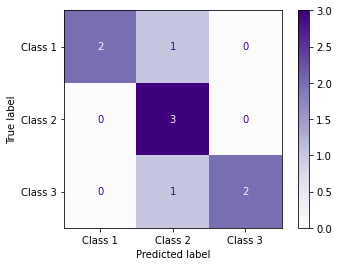

In [10]:
sklearn.metrics.plot_confusion_matrix(estimator, X2, y2, cmap=plt.cm.Purples)
plt.show()